In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, tree, naive_bayes, preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
%matplotlib inline

A) Preprocessing and data analysis

Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

In [49]:
# Loading in data
data = pd.read_csv("adult-modified.csv", na_values=["?"])
data

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.0,Private,10,Married,White,Male,60,>50K
9996,25.0,Private,9,Single,White,Female,8,<=50K
9997,21.0,Private,10,Single,Black,Male,40,<=50K
9998,NaN,Private,2,Married,White,Male,53,<=50K


In [50]:
# Checking for missing vlaues
data.isnull()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False
9998,True,False,False,False,False,False,False,False


In [51]:
# Found missing values in age
data[data.age.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
80,NaN,Private,9,Single,White,Male,30,<=50K
...,...,...,...,...,...,...,...,...
9944,NaN,Private,12,Single,White,Female,45,<=50K
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


In [52]:
# Fill in with attribute mean for missing values for numeric attributes
age_mean = data.age.mean()
data.age.fillna(age_mean, axis=0, inplace=True)
data[data.age.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [53]:
# found missing values in workclass
data[data.workclass.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
27,38.449806,NaN,10,Married,Asian,Male,60,>50K
61,32.000000,NaN,4,Married,White,Male,40,<=50K
69,25.000000,NaN,10,Single,White,Male,40,<=50K
77,67.000000,NaN,6,Married,White,Male,2,<=50K
106,17.000000,NaN,6,Single,White,Female,32,<=50K
...,...,...,...,...,...,...,...,...
9907,68.000000,NaN,9,Married,White,Male,15,<=50K
9926,73.000000,NaN,7,Married,White,Male,8,<=50K
9927,18.000000,NaN,7,Single,White,Female,20,<=50K
9938,36.000000,NaN,10,Single,White,Female,25,<=50K


In [54]:
data.drop(data[data.workclass.isnull()].index, axis=0)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.000000,Public,13,Single,White,Male,40,<=50K
1,50.000000,Self-emp,13,Married,White,Male,13,<=50K
2,38.000000,Private,9,Single,White,Male,40,<=50K
3,53.000000,Private,7,Married,Black,Male,40,<=50K
4,28.000000,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.000000,Private,10,Married,White,Male,60,>50K
9996,25.000000,Private,9,Single,White,Female,8,<=50K
9997,21.000000,Private,10,Single,Black,Male,40,<=50K
9998,38.449806,Private,2,Married,White,Male,53,<=50K


In [55]:
# no missing values in education
data[data.education.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [56]:
# No missing values in varital-status
marital = data['marital-status']
data[marital.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [57]:
# No missing values in race
data[data.race.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [58]:
# No missing values in sex
data[data.sex.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [59]:
# No missing values for hours-per-week
hours = data["hours-per-week"]
data[hours.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [60]:
# No missing values for income
data[data.income.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distributions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.

Text(0, 0.5, 'Count')

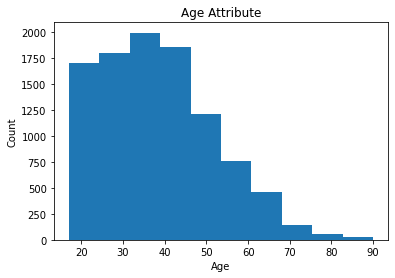

In [61]:
# Creating histogram for age attribute
age = data.age
axAge = age.plot(kind="hist", bins=10, title="Age Attribute")
axAge.set_xlabel("Age")
axAge.set_ylabel("Count")

<AxesSubplot:title={'center':'Workclass Attribute'}, xlabel='Workclass', ylabel='Count'>

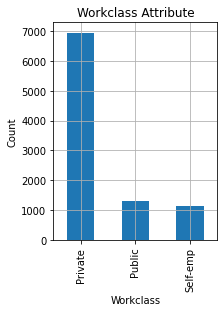

In [62]:
# Bar graph for categorical attribute workclass
workclass = data["workclass"].value_counts()
figWork = plt.figure(figsize=(10,4))
axWork = figWork.add_subplot(131)
axWork.set_xlabel('Workclass')
axWork.set_ylabel('Count')
axWork.set_title("Workclass Attribute")
workclass.plot(kind='bar', grid = True)

Text(0, 0.5, 'Count')

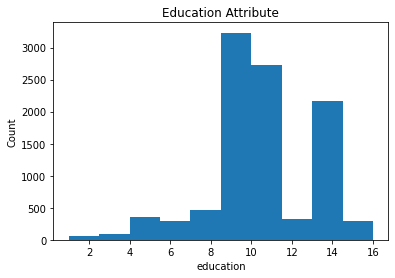

In [63]:
# Histogram for Education Attribute

education = data.education
axEd = education.plot(kind="hist", bins=10, title="Education Attribute")
axEd.set_xlabel("education")
axEd.set_ylabel("Count")

<AxesSubplot:title={'center':'Marital Status Attribute'}, xlabel='Marital Status', ylabel='Count'>

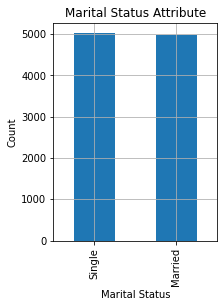

In [64]:
# Bar graph for categorical attribute marital-status
marital = data["marital-status"].value_counts()
figMar = plt.figure(figsize=(10,4))
axMar = figMar.add_subplot(131)
axMar.set_xlabel('Marital Status')
axMar.set_ylabel('Count')
axMar.set_title("Marital Status Attribute")
marital.plot(kind='bar', grid = True)

<AxesSubplot:title={'center':'Race Attribute'}, xlabel='Race', ylabel='Count'>

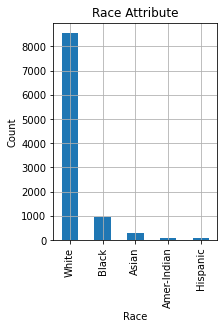

In [65]:
# Bar graph for categorical attribute race
race = data["race"].value_counts()
figRace = plt.figure(figsize=(10,4))
axRace = figRace.add_subplot(131)
axRace.set_xlabel('Race')
axRace.set_ylabel('Count')
axRace.set_title("Race Attribute")
race.plot(kind='bar', grid = True)

Text(0, 0.5, 'Count')

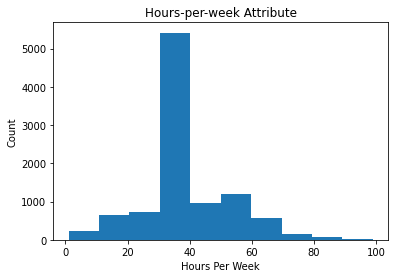

In [66]:
# Histogram for hours per week attribute
hours = data["hours-per-week"]
axHours = hours.plot(kind="hist", bins=10, title="Hours-per-week Attribute")
axHours.set_xlabel("Hours Per Week")
axHours.set_ylabel("Count")

<AxesSubplot:title={'center':'Income Attribute'}, xlabel='Race', ylabel='Count'>

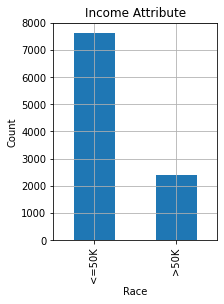

In [67]:
# Bar graph for income attribute
income = data["income"].value_counts()
figIncome = plt.figure(figsize=(10,4))
axIncome = figIncome.add_subplot(131)
axIncome.set_xlabel('Race')
axIncome.set_ylabel('Count')
axIncome.set_title("Income Attribute")
income.plot(kind='bar', grid = True)

Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     15
2                    0      1      4         3     41
3                    0      4      6         3     75
4                    5      5     17         6    172
5                    0      3     23         2    125
6                    9      4     31         4    247
7                    4      7     52         5    295
8                    0      3     19         3     84
9                   35     71    377        25   2724
10                  29     69    219        11   1977
11                   6     11     34         4    361
12                   5      5     35         3    270
13                   6     78    105        11   1430
14                   0     28     21         1    481
15                   0     12      5         2    155
16                   0      8      4         0    104


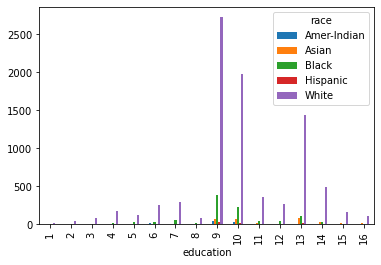

In [68]:
# Cross tab for education + race
ed_race = pd.crosstab(data["education"], data["race"])
print(ed_race)
plt.show(ed_race.plot(kind="bar"))

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423


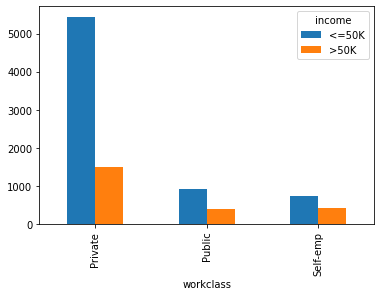

In [69]:
# Cross tab for workclass + income
work_inc = pd.crosstab(data["workclass"], data["income"])
print(work_inc)
plt.show(work_inc.plot(kind="bar"))

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060


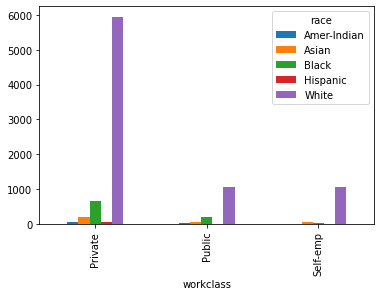

In [70]:
# Cross tab for workclass + race
work_race = pd.crosstab(data["workclass"], data["race"])
print(work_race)
plt.show(work_race.plot(kind="bar"))

income       <=50K  >50K
race                    
Amer-Indian     89    10
Asian          241    68
Black          832   121
Hispanic        77     6
White         6382  2174


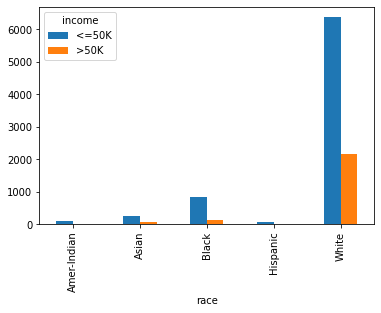

In [71]:
# Cross tab for race + income
race_income = pd.crosstab(data["race"], data["income"])
print(race_income)
plt.show(race_income.plot(kind="bar"))

In [72]:
# Creating additional table for showing percentages of each race category that fall in the low-income group
low_income = data[data['income'] == '<=50K']
low_income['race'].value_counts(normalize=True) * 100

White          83.742291
Black          10.917202
Asian           3.162315
Amer-Indian     1.167826
Hispanic        1.010366
Name: race, dtype: float64

In [73]:
# Getting percentage for high income for comparison
high_income = data[data['income'] == '>50K']
high_income['race'].value_counts(normalize=True) * 100

White          91.382934
Black           5.086171
Asian           2.858344
Amer-Indian     0.420345
Hispanic        0.252207
Name: race, dtype: float64

When comparing the percentages between low income and high income, we can see that white takes up a very large majority for both low (~ 83%) and high (~ 91%) income. One thing to note is that for low income, Black increased by 5% when going from high income to low income. When compared to the other reaces besides White, this is a larger increase as the others only increase by about 1%.

Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

In [74]:
# Comparing workclass with low-income and high-income

# Low income comparison
print("Low:")
print(low_income['workclass'].value_counts(normalize=True) * 100)
print("\n")
# high income comparison
print("High:")
print(high_income['workclass'].value_counts(normalize=True) * 100)

Low:
Private     76.737629
Public      13.041026
Self-emp    10.221345
Name: workclass, dtype: float64


High:
Private     64.855541
Self-emp    18.240621
Public      16.903838
Name: workclass, dtype: float64


When comparing workclass and income, we can see that the majority for both low and high income are in the Private workclass. We can also see that Self-employed is the second highest percentage in high income whereas it has the lowest percentage in low income. It is also important to note that self-employed and public increase in percentage when going from low to high income while private decreases.

In [75]:
# Comparing marital status with low-income and high-income

# Low income comparison
print("Low:")
print(low_income['marital-status'].value_counts(normalize=True) * 100)
print("\n")
# high income comparison
print("High:")
print(high_income['marital-status'].value_counts(normalize=True) * 100)

Low:
Single     61.671697
Married    38.328303
Name: marital-status, dtype: float64


High:
Married    86.675074
Single     13.324926
Name: marital-status, dtype: float64


For this comparison, the most drastic piece of info that I see is that the majority is flipped when going from low to high income where SIngle is the majority in low income and Married is the majority in high income. This makes sense since couples make a collective larger amount since they pool their money together. It is also important to see taht there is still more than a quarter percentage in low income that are married.

In [76]:
# Comparing sex with low-income and high-income

# Low income comparison
print("Low:")
print(low_income['sex'].value_counts(normalize=True) * 100)
print("\n")
# high income comparison
print("High:")
print(high_income['sex'].value_counts(normalize=True) * 100)

Low:
Male      61.69794
Female    38.30206
Name: sex, dtype: float64


High:
Male      84.110971
Female    15.889029
Name: sex, dtype: float64


For the sex attribute, we can see that the large majority for high income is Male while the percentages are a little more evened out for low income. The jump from low income to high income for males is a little more than 20% while females decrease in the same amount.

B) Predictive Modeling and Model Evaluation:

Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).

In [77]:
# Creating dummy variables for categorical attributes
data_matrix = pd.get_dummies(data, columns=['workclass','marital-status','race','sex','income'])
data_matrix

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.000000,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.000000,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38.000000,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53.000000,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28.000000,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38.000000,10,60,1,0,0,1,0,0,0,0,0,1,0,1,0,1
9996,25.000000,9,8,1,0,0,0,1,0,0,0,0,1,1,0,1,0
9997,21.000000,10,40,1,0,0,0,1,0,0,1,0,0,0,1,1,0
9998,38.449806,2,53,1,0,0,1,0,0,0,0,0,1,0,1,1,0


In [78]:
# separating target attribute from the attributes for training
target = data_matrix['income_>50K']
target

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: income_>50K, Length: 10000, dtype: uint8

In [79]:
# Dropping income<=50K and income>50K from the data
data_matrix = data_matrix.drop(['income_<=50K', 'income_>50K'],axis=1)
data_matrix

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.000000,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.000000,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.000000,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.000000,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.000000,13,40,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38.000000,10,60,1,0,0,1,0,0,0,0,0,1,0,1
9996,25.000000,9,8,1,0,0,0,1,0,0,0,0,1,1,0
9997,21.000000,10,40,1,0,0,0,1,0,0,1,0,0,0,1
9998,38.449806,2,53,1,0,0,1,0,0,0,0,0,1,0,1


Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.

In [80]:
# creating training and testing sets
data_train, data_test, target_train, target_test = train_test_split(data_matrix, target, test_size=0.2, random_state=33)
data_train

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
7998,47.0,9,20,0,0,1,1,0,0,0,0,0,1,1,0
3584,27.0,15,65,1,0,0,0,1,0,0,0,0,1,1,0
4295,47.0,9,40,1,0,0,1,0,0,0,1,0,0,0,1
5560,27.0,10,40,1,0,0,1,0,0,1,0,0,0,0,1
651,24.0,9,50,1,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,35.0,11,40,1,0,0,1,0,0,0,0,0,1,0,1
578,58.0,13,40,0,1,0,0,1,0,0,0,0,1,1,0
5848,67.0,13,8,0,0,1,1,0,0,0,0,0,1,0,1
2439,32.0,10,40,0,0,1,1,0,0,0,0,0,1,0,1


In [81]:
target_train

7998    1
3584    1
4295    0
5560    1
651     0
       ..
57      0
578     0
5848    1
2439    0
7188    0
Name: income_>50K, Length: 8000, dtype: uint8

In [82]:
# Creating Naive Bayes classifier and performing cross validation
nb_clf = naive_bayes.GaussianNB()
nbcv_scores = model_selection.cross_val_score(nb_clf, data_matrix, target, cv=5)
print("Overall Accuracy for Naive Bayes: %0.2f (+/- %0.2f)" % (nbcv_scores.mean(), nbcv_scores.std() * 2))

Overall Accuracy for Naive Bayes: 0.72 (+/- 0.00)


In [83]:
# Creating decision tree classifier using entropy and performing cross validation
tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
treecv_scores = model_selection.cross_val_score(tree_clf, data_matrix, target, cv=5)
print("Overall Accuracy for Decision Tree: %0.2f (+/- %0.2f)" % (treecv_scores.mean(), treecv_scores.std() * 2))

Overall Accuracy for Decision Tree: 0.77 (+/- 0.01)


In [89]:
# Creating decision tree classifier using entropy and performing cross validation
ld_clf = LinearDiscriminantAnalysis()
ldcv_scores = model_selection.cross_val_score(ld_clf, data_matrix, target, cv=5)
print("Overall Accuracy for Linear Discriminant Analysis: %0.2f (+/- %0.2f)" % (ldcv_scores.mean(), ldcv_scores.std() * 2))

Overall Accuracy for Linear Discriminant Analysis: 0.81 (+/- 0.01)


For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

In [85]:
# Fitting decision tree before exportin to visualization
tree_clf = tree_clf.fit(data_train, target_train)

[Text(190.61260918674157, 213.69103448275862, 'X[7] <= 0.5\nentropy = 0.793\nsamples = 8000\nvalue = [6088, 1912]'),
 Text(100.92334535078314, 206.19310344827585, 'X[1] <= 11.5\nentropy = 0.981\nsamples = 3971\nvalue = [2311, 1660]'),
 Text(26.341961851460027, 198.6951724137931, 'X[1] <= 8.5\nentropy = 0.882\nsamples = 2715\nvalue = [1899, 816]'),
 Text(6.779460326990579, 191.19724137931036, 'X[2] <= 39.0\nentropy = 0.482\nsamples = 470\nvalue = [421, 49]'),
 Text(2.5822833918344728, 183.69931034482758, 'X[3] <= 0.5\nentropy = 0.136\nsamples = 105\nvalue = [103, 2]'),
 Text(2.334878995012008, 176.20137931034483, 'X[2] <= 27.0\nentropy = 0.271\nsamples = 43\nvalue = [41, 2]'),
 Text(2.087474598189544, 168.70344827586206, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(2.5822833918344728, 168.70344827586206, 'X[1] <= 7.5\nentropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(2.334878995012008, 161.2055172413793, 'X[1] <= 3.5\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Tex

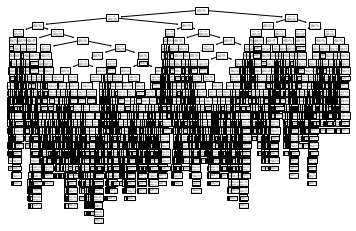

In [93]:
# Visualizing the decision tree.
# I tried all the methods provided in the example code but I could not get any to work.
# I even tried using an online converter but it didn't turn out good.
# This is the best that I can from my research online and given the size of the decision tree
tree.plot_tree(tree_clf)

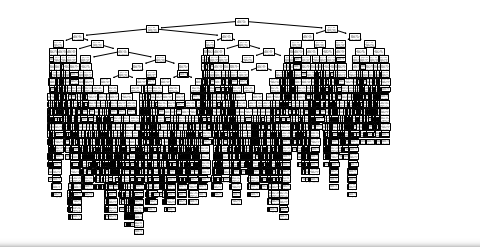